### Bir online perakende mağazasının müşteri siparişleri üzerine bir veri seti oluşturuldu. Bu veri setinde, müşterilerin sipariş verme tarihleri, ürünleri ve miktarları, ödeme yöntemleri, bölgesel bilgileri gibi veriler yer alıyor. Bu verilerin kullanımı, mağazanın stok yönetimini ve müşteri hizmetlerini geliştirmek için kullanılacak.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, ttest_ind

# Veri Setini Oluşturma

In [8]:
# veri setini oluşturalım.

order_dates = pd.date_range(start='2022-01-01', end='2022-12-31') # tarih
products = ['Kalem', 'Defter', 'Silgi', 'Çanta', 'Kitap'] # ürün
quantities = np.random.randint(1, 10, size=len(order_dates)) # adet
payment_methods = ['Kredi Kartı', 'Havale', 'Nakit'] # ödeme yöntemi
regions = ['Ankara', 'İstanbul', 'İzmir', 'Bursa'] # bölge

df = pd.DataFrame({
    'Tarih': order_dates,
    'Ürün': np.random.choice(products, size=len(order_dates)),
    'Adet': quantities,
    'Ödeme Yöntemi': np.random.choice(payment_methods, size=len(order_dates)),
    'Bölge': np.random.choice(regions, size=len(order_dates))
})

df.head()

,Tarih,Ürün,Adet,Ödeme Yöntemi,Bölge
0,2022-01-01,Kalem,9,Kredi Kartı,İstanbul
1,2022-01-02,Kitap,5,Havale,Ankara
2,2022-01-03,Kitap,8,Nakit,İzmir
3,2022-01-04,Çanta,3,Nakit,Ankara
4,2022-01-05,Kalem,4,Nakit,İstanbul


# Veri Görselleştirme

#### Veri setindeki değişkenlerin dağılımlarını görselleştirmek, verileri daha iyi anlamamıza yardımcı olur. 

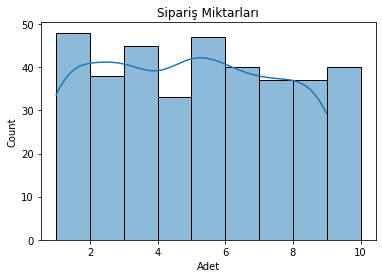

In [9]:
sns.histplot(data=df, x='Adet', bins=range(1, 11), kde=True)
plt.title('Sipariş Miktarları')
plt.show()

#### Histogramda, verilerin normal dağılıma benzediği görülüyor. Bunun yanı sıra, QQ-plot ve Shapiro-Wilk testi gibi normalite testleri de uygulanabilir. Bu testlerin sonuçlarına bakarak dağılımın normal olduğunu onaylayabiliriz.

In [11]:
# normalite testi

stat, p = shapiro(df['Adet'])
print(f'Statistic = {stat}\nP-value = {p}')

Statistic = 0.9290306568145752
P-value = 3.732293120395358e-12


#### p değeri 0.05 'ten küçük olduğu için normal dağılım varsayımı reddedilir. Yani verilerin dağılımı normal dağılmıyor.

# Hipotez Testi

#### Veri setimizde hipotez testi yapmak için, müşterilerin farklı bölge ve ödeme yöntemleri kullanarak verdikleri siparişlerin ortalama değerlerini karşılaştırabiliriz. Örneğin, İstanbul ve İzmir 'den yapılan kredi kartı ödemeli siparişlerin ortalama değerleri arasında anlamlı bir fark olup olmadığını test edebiliriz.

### Hipotezlerimiz:

#### H0: İstanbul ve İzmir'den yapılan kredi kartı ödemeli siparişlerin ortalama değerleri arasında anlamlı bir fark yoktur.

#### H1: İstanbul ve İzmir'den yapılan kredi kartı ödemeli siparişlerin ortalama değerleri arasında anlamlı bir fark vardır.

#### Bu hipotezleri test etmek için, öncelikle gruplar arasındaki verilerin varyansların eşit olup olmadığını test edebiliriz. Bu amaçla, Levene testi kullanabiliriz.

In [14]:
# varyans homojenliği testi

ist_kk = df.loc[(df['Bölge'] == 'İstanbul') & (df['Ödeme Yöntemi'] == 'Kredi Kartı'), 'Adet']
izm_kk = df.loc[(df['Bölge'] == 'İzmir') & (df['Ödeme Yöntemi'] == 'Kredi Kartı'), 'Adet']

stat, p = levene(ist_kk, izm_kk)
print(f'Statistic = {stat}\nP-value = {p}')

Statistic = 0.3233904374226736
P-value = 0.5719791237571124


#### p-value değeri 0.05 'ten büyük olduğu için varyans homojenliği varsayımı kabul edilir.

#### Sonuçlar, varyans homojenliği varsayımını destekliyor. Bu nedenle, iki bağımsız örneklem t-testi uygulayabiliriz.

In [15]:
# t-testi

t_stat, p = ttest_ind(ist_kk, izm_kk)
print(f'Statistic = {t_stat}\nP-value = {p}')

Statistic = -1.16054305044283
P-value = 0.25102868276445206


#### P-value değeri 0.05 'den büyük olduğu için H0 hipotezi reddedilmez. Bu sonuca göre, İstanbul ve İzmir'den yapılan kredi kartı ödemeli siparişlerin ortalama değerleri arasında anlamlı bir fark yoktur.